## import modules

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

## define model architecture

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

## define training and inference routines

In [3]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


In [4]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


## create data loaders

In [5]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=1000, shuffle=True)

## define optimizer and run training epochs

In [6]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)
np.random.seed(0)
random.seed(0)

device = torch.device("cpu")

model = Net()
optimizer = optim.Adadelta(model.parameters(), lr=0.5)

# scheduler = StepLR(optimizer, step_size=1, gamma=0.7)

## model training

In [7]:
for epoch in range(1, 3):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.318902
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.260487
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.845640
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.910280
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.390269
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.332739
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.448877
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.298393
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.503042
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.223934
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.408854
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.164622
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.169872
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.469457
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.381625
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.340721
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.175661
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.176566
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.163720
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.197197
Train Epoch: 1 [12800/60000 (

Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.034660
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.024653
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.081592
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.074604
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.044495
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.098270
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.073216
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.014415
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.004895
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.025325
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.100192
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.115016
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.136716
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.074478
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.010072
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.051746
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.123856
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.166777
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.003768
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.340687


## run inference on trained model

In [8]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

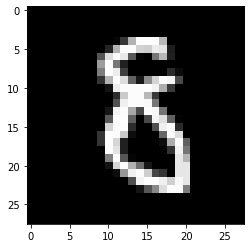

In [9]:
plt.imshow(example_data[0][0], cmap='gray', interpolation='none')

In [10]:
model(example_data).data.max(1, keepdim=True)[1][0]

tensor([8])